In [48]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import statistics as st
from mpl_toolkits.mplot3d import Axes3D

In [49]:
#INIT
# dimentions of walk
d = 2
# number of trials
n = 100
# steps per trial
s = 50
# Nonreversable
r = True
# Current position
pos = np.zeros((1, d),dtype='int')
# List of positions walks end in
endingPos = np.zeros((n, d),dtype='int')
endingDists = np.zeros((n, 1),dtype='float')
allPos = np.zeros((n, s+1, d),dtype='int')
# Direction Variables
prevdir = 0
direction = 0

In [50]:
def distFromOrigin(position):
    global d
    if(d == 1):
        return math.fabs(position[0])
    elif(d == 2):
        return math.fabs(math.sqrt((position[0] - 0)**2 + (position[1] - 0)**2))
    elif(d == 3):
        return math.fabs(math.sqrt((position[0] - 0)**2 + (position[1] - 0)**2 + (position[2] - 0)**2))


In [55]:
def makeGraph(index, nameaddon = ""):
    global allPos
    global d
    if d == 1:
        plt.figure()
        plt.plot(np.arange(s+1), allPos[index][:, 0])
        plt.title(f'{nameaddon} 1D Random Walk {index + 1}')
        plt.xlabel('Step')
        plt.ylabel('Position')
        plt.plot()
    elif d == 2:
        plt.figure()
        plt.plot(allPos[index][:, 0], allPos[index][:, 1])
        plt.title(f'{nameaddon} 2D Random Walk {index + 1}')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)
        plt.plot()
    elif d == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(allPos[index][:, 0], allPos[index][:, 1], allPos[index][:, 2])
        ax.set_title(f'{nameaddon} 3D Random Walk {index + 1}')
        ax.set_xlabel('X Position')
        ax.set_ylabel('Y Position')
        ax.set_zlabel('Z Position')
        max_range = np.array([allPos[index][:, 0].max()-allPos[index][:, 0].min(),
                              allPos[index][:, 1].max()-allPos[index][:, 1].min(), 
                              allPos[index][:, 2].max()-allPos[index][:, 2].min()]).max() / 2.0
        mid_x = (allPos[index][:, 0].max()+allPos[index][:, 0].min()) * 0.5
        mid_y = (allPos[index][:, 1].max()+allPos[index][:, 1].min()) * 0.5
        mid_z = (allPos[index][:, 2].max()+allPos[index][:, 2].min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)

Text(0, 0.5, 'Distance')

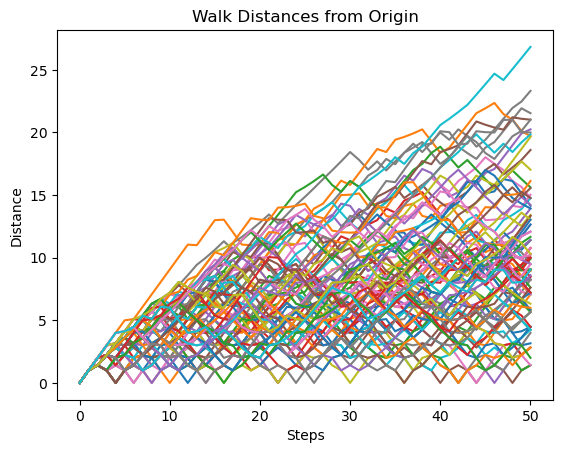

In [52]:
# RUN
returnedToOrigin = 0
for i in np.arange(0, n):
    pos = np.zeros((1, d),dtype='int')
    # Save positions used in current walk, will be useful later
    walkDists = np.zeros((s+1, 1),dtype='float')
    allPos[i][0] = pos
    prevdir = 0
    for j in np.arange(1, s+1):
        direction = random.randint(-d, d)
        while((r and direction*-1 == prevdir) or (direction == 0)):
            direction = random.randint(-d, d)
        if(direction == -1): #LEFT
            pos[0][0] -= 1
        elif(direction == 1): #RIGHT
            pos[0][0] += 1
        elif(direction == -2): # DOWN
            pos[0][1] -= 1
        elif(direction == 2): # UP
            pos[0][1] += 1
        elif(direction == -3): # BACK
            pos[0][2] -= 1
        elif(direction == 3): # FORWARDS
            pos[0][2] += 1
        allPos[i][j] = pos
        prevdir = direction
        walkDists[j] = distFromOrigin(pos[0])
    plt.plot(walkDists)
    endingPos[i] = pos
    endingDists[i] = distFromOrigin(pos[0])
plt.title('Walk Distances from Origin')
plt.xlabel('Steps')
plt.ylabel('Distance')

In [53]:
if(bool(int(input("Display all walks? (1 or 0) "))) == True):
    for view in range(len(allPos)):
        makeGraph(view)

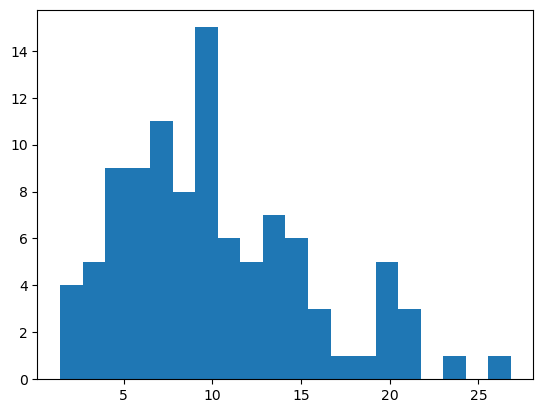

Max: 26.832815729997478
Min: 1.4142135623730951
Mean: 10.089586669934556
Mode: 7.0710678118654755
Median: 9.055385138137417
Standard Deviation: 5.402977184333018


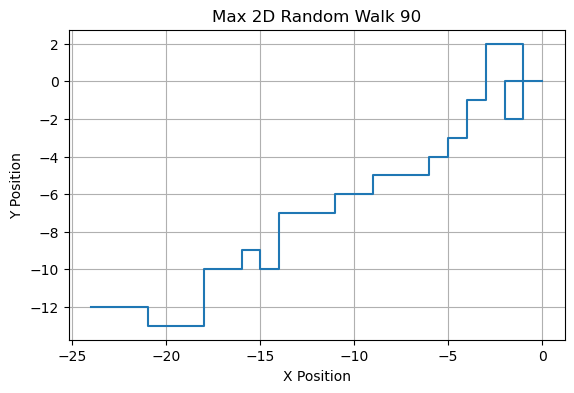

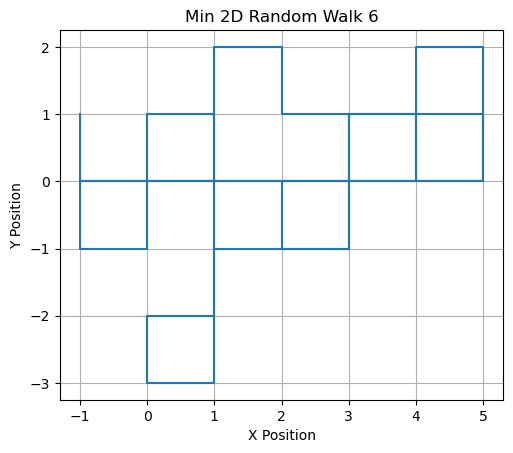

In [57]:
plt.show(plt.hist(endingDists, 20))
print(f'Max: {endingDists.max()}')
makeGraph(np.where(endingDists == endingDists.max())[0][0], "Max")
print(f'Min: {endingDists.min()}')
makeGraph(np.where(endingDists == endingDists.min())[0][0], "Min")
# Need to convert to list to do the stats that I know how to do
distsList = np.ndarray.tolist(endingDists)
distsList = [item for sublist in distsList for item in sublist]
print(f'Mean: {st.mean(distsList)}')
print(f'Mode: {st.mode(distsList)}')
print(f'Median: {st.median(distsList)}')
print(f'Standard Deviation: {st.stdev(distsList)}')